Algunas exploraciones y resúmenes
=================================

En general cuando se tienen algo de información, una vez que se carga lo que se hace es explorarla. Esto desde mi práctica es al inicio conocer el tipo de varibles, rangos, missing values, etc. Después hacer un poco de exploración gráfica para ir conociendo las posibles relaciones entre variables, en caso de tratar de construir algún modelo o para hacer algunas modificaciones entre los datos. En lo personal, pienso que primero uno debe de jugar un poco con los datos y luego empezar a preguntarse cosas.

Objetivo
--------

*Cargo datos relacionados con los ingresos proporcionados por SHCP, se eligen algunas columnas para trabajar la información y se exploran las relaciones entre los montos registrados por mes, año, mes-año y año-sector. La intención es responder las siguientes preguntas sencillas:*

  1. *¿En qué año se registró un mayor monto?*
  2. *¿En qué mes se tienen la media más alta de monto?*
  3. *¿En qué año y mes se registran los mayores montos?*
  4. *¿En qué año y sector se registran los mayores montos?*

Datos
-----

Para conocer los detalles de los datos usados en el ejemplo se puede consultar información en el  link siguiente:
   * [http://catalogo.datos.gob.mx/dataset/estadisticas-oportunas-de-finanzas-publicas](http://catalogo.datos.gob.mx/dataset/estadisticas-oportunas-de-finanzas-publicas)

In [26]:
#Se prepara el entorno de trabajo
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#matplotlib.style.use('ggplot') se puede correr este código para usar gráficos del tipo de ggplot2 en R
pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize']=(20,7)
# -*- coding: utf-8 -*-

In [34]:
#Se cargan los datos desde un directorio
Ingresos=pd.read_csv('~/Documentos/Tutorial-Python/Datos/Ingreso.csv')

In [35]:
Ingresos.head()

,CICLO,MES,CLAVE_DE_CONCEPTO,NOMBRE,TEMA,SUBTEMA,SECTOR,AMBITO,TIPO_DE_INFORMACION,BASE_DE_REGISTRO,UNIDAD_DE_MEDIDA,PERIODO_INICIO,PERIODO_FINAL,FRECUENCIA,DESC_DIFUSION,MONTO
0,2011,Enero,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990.01,2014.12,Mensual,30 d�as despu�s del cierre del mes de referencia,71395961.0
1,2011,Febrero,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990.01,2014.12,Mensual,30 d�as despu�s del cierre del mes de referencia,54388829.0
2,2011,Marzo,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990.01,2014.12,Mensual,30 d�as despu�s del cierre del mes de referencia,57029277.0
3,2011,Abril,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990.01,2014.12,Mensual,30 d�as despu�s del cierre del mes de referencia,78204810.0
4,2011,Mayo,XAB2120,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Ingreso,Sector P�blico Federal Presupuestario,Federal,Flujo,Pagado,Miles de Pesos,1990.01,2014.12,Mensual,30 d�as despu�s del cierre del mes de referencia,76701991.0


In [25]:
#Cantidad de filas y columnas.
Ingresos.shape

(209108, 16)

In [5]:
#Descripción en general de las variables
Ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209108 entries, 0 to 209107
Data columns (total 16 columns):
CICLO                  209108 non-null int64
MES                    209108 non-null object
CLAVE_DE_CONCEPTO      209108 non-null object
NOMBRE                 209024 non-null object
TEMA                   209108 non-null object
SUBTEMA                209108 non-null object
SECTOR                 209108 non-null object
AMBITO                 209108 non-null object
TIPO_DE_INFORMACION    209108 non-null object
BASE_DE_REGISTRO       209108 non-null object
UNIDAD_DE_MEDIDA       209108 non-null object
PERIODO_INICIO         209108 non-null float64
PERIODO_FINAL          209108 non-null float64
FRECUENCIA             209108 non-null object
DESC_DIFUSION          209108 non-null object
MONTO                  179144 non-null float64
dtypes: float64(3), int64(1), object(12)
memory usage: 25.5+ MB


In [6]:
#Con dtypes es facil ver el tipo de dato que se tienen en las variables
Ingresos.dtypes

CICLO                    int64
MES                     object
CLAVE_DE_CONCEPTO       object
NOMBRE                  object
TEMA                    object
SUBTEMA                 object
SECTOR                  object
AMBITO                  object
TIPO_DE_INFORMACION     object
BASE_DE_REGISTRO        object
UNIDAD_DE_MEDIDA        object
PERIODO_INICIO         float64
PERIODO_FINAL          float64
FRECUENCIA              object
DESC_DIFUSION           object
MONTO                  float64
dtype: object

In [36]:
#Se seleccionan las columnas que yo considero  más importates. En este caso Ciclo, Mes, Nombre, Tema, Sector
# y Monto, son a mi parecer los más relevantes.
#Si solo se deseara elegir una sola columna, se usaría Ingresos['Nombre de la columna']
Ingresos_2=Ingresos[['CICLO','MES','NOMBRE','TEMA','SECTOR','MONTO']]

In [37]:
Ingresos_2.head()

,CICLO,MES,NOMBRE,TEMA,SECTOR,MONTO
0,2011,Enero,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,71395961.0
1,2011,Febrero,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,54388829.0
2,2011,Marzo,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,57029277.0
3,2011,Abril,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,78204810.0
4,2011,Mayo,Ingresos petroleros del Gobierno Federal,Estad�sticas de Finanzas P�blicas,Sector P�blico Federal Presupuestario,76701991.0


Con la muestra de datos que se define en Ingresos_2, la idea es procesarla y explorar los datos. Esto de manera sencilla implica conocer los tipos de variables, que ya se hizo con el comando *info()*. Pero lo que se puede buscar es hacer un análisis exploratorio sencillo. Esto tanto de manera gráfica, como de manera de estruturas de datos. Para revisar las posibles relaciones entre los montos y los años o alguna otra variable, se hace uso de **agrupaciones**. Con esto se hace cierto resumen entre las variables.

In [8]:
#Para responder ¿cuál es el año con mayor monto registrado? se hace la siguente agrupación.
Grupo_1=Ingresos_2.groupby('CICLO')

In [9]:
#La cantidad de registros para cada año
Grupo_1.size()

CICLO
2011    34532
2012    35072
2013    35132
2014    34700
2015    34836
2016    34836
dtype: int64

In [10]:
Grupo_1.sum()

,MONTO
CICLO,
2011,3.780491e+11
2012,4.242216e+11
2013,4.393173e+11
2014,4.581749e+11
2015,4.703271e+11
2016,4.263203e+10


La misma idea se puede hacer con respecto a los meses para conocer como se comportan los montos. Esto ayuda a responder la pregunta, *¿qué mes tiene la media más alta en montos?

In [11]:
Grupo_2=Ingresos_2.groupby('MES')

In [12]:
#La cantidad de registros en cada mes
Grupo_2.size()

MES
Abril         17511
Agosto        17383
Diciembre     17383
Enero         17511
Febrero       17511
Julio         17383
Junio         17383
Marzo         17511
Mayo          17383
Noviembre     17383
Octubre       17383
Septiembre    17383
dtype: int64

In [13]:
Grupo_2.mean()

,CICLO,MONTO
MES,,
Abril,2013.496031,1.205833e+07
Agosto,2013.503365,1.082641e+07
Diciembre,2013.503365,1.550864e+07
Enero,2013.496031,1.421048e+07
Febrero,2013.496031,1.108835e+07
Julio,2013.503365,1.227927e+07
Junio,2013.503365,1.269322e+07
Marzo,2013.496031,1.222004e+07
Mayo,2013.503365,1.099283e+07


Lo que se observa del grupo anterior es que al ver la media, muestra los valores para MONTO y CICLO. La cuestion es que CICLO es tomada como una variable numérica cuando se cargan los datos y al hacer la agrupación respecto a los meses muestra la media de las variables numéricas. Para que solo se muestren los valores de la suma de los montos, se hace del siguiente modo:

In [14]:
Grupo_2.mean()['MONTO']

MES
Abril         1.205833e+07
Agosto        1.082641e+07
Diciembre     1.550864e+07
Enero         1.421048e+07
Febrero       1.108835e+07
Julio         1.227927e+07
Junio         1.269322e+07
Marzo         1.222004e+07
Mayo          1.099283e+07
Noviembre     1.265846e+07
Octubre       1.164529e+07
Septiembre    1.169692e+07
Name: MONTO, dtype: float64

In [15]:
#Si uno desea saber cual es el mes con la media de montos mayor, basta elegir el máximo de los valores de las medias al
#ordenarlas. En este caso corresponde al mes de Diciembre. 
Grupo_2['MONTO'].mean().sort_values()[-1:]

MES
Diciembre    1.550864e+07
Name: MONTO, dtype: float64

In [16]:
#Agrupamos la información por años y mes para conocer como se comportan los montos 
Grupo_3=Ingresos_2.groupby(['CICLO','MES'])

In [17]:
#Vemos el valor de la suma de los montos
Grupo_3.sum()

MONTO
CICLO MES                     
2011  Abril       3.109748e+10
      Agosto      2.865291e+10
      Diciembre   4.339038e+10
      Enero       3.394312e+10
      Febrero     2.747139e+10
      Julio       2.988121e+10
      Junio       3.179959e+10
      Marzo       3.074575e+10
      Mayo        2.748545e+10
      Noviembre   3.389238e+10
      Octubre     2.888867e+10
      Septiembre  3.080078e+10
2012  Abril       3.525511e+10
      Agosto      3.074125e+10
      Diciembre   3.896561e+10
      Enero       4.130349e+10
      Febrero     3.419770e+10
      Julio       3.589384e+10
      Junio       3.663400e+10
      Marzo       3.726697e+10
      Mayo        3.163785e+10
      Noviembre   3.746925e+10
      Octubre     3.345142e+10
      Septiembre  3.140516e+10
2013  Abril       3.890359e+10
      Agosto      3.072361e+10
      Diciembre   4.927575e+10
      Enero       3.962627e+10
      Febrero     3.413998e+10
      Julio       3.426500e+10
...                        ...
2014  Junio       3.898481e+10
      Marzo       3.805636e+10
      Mayo        3.418820e+10
      Noviembre   3.812035e+10
      Octubre     3.783762e+10
      Septiembre  3.699763e+10
2015  Abril       3.621140e+10
      Agosto      3.489823e+10
      Diciembre   5.274221e+10
      Enero       4.635147e+10
      Febrero     3.264979e+10
      Julio       3.962429e+10
      Junio       4.026281e+10
      Marzo       3.989799e+10
      Mayo        3.557104e+10
      Noviembre   4.112573e+10
      Octubre     3.561610e+10
      Septiembre  3.537609e+10
2016  Abril       0.000000e+00
      Agosto      0.000000e+00
      Diciembre   0.000000e+00
      Enero       4.263203e+10
      Febrero     0.000000e+00
      Julio       0.000000e+00
      Junio       0.000000e+00
      Marzo       0.000000e+00
      Mayo        0.000000e+00
      Noviembre   0.000000e+00
      Octubre     0.000000e+00
      Septiembre  0.000000e+00

[72 rows x 1 columns]

Para elegir los 5 registros con los montos más alta, hacemos la siguiente selección al Grupo_3

In [18]:
Grupo_3.sum().sort_values(by='MONTO')[-5:]

,,MONTO
CICLO,MES,
2011,Diciembre,4.339038e+10
2014,Enero,4.492645e+10
2015,Enero,4.635147e+10
2013,Diciembre,4.927575e+10
2015,Diciembre,5.274221e+10


In [38]:
#Se puede revisar como se comporta por CICLO y SECTOR, elegimos los 15 registros con valor más 
# alto en la suma de su MONTO
Ingresos_2.groupby(['CICLO','SECTOR']).sum().sort_values(by='MONTO')[-15:]

,,MONTO
CICLO,SECTOR,
2011,Sector Empresas P�blicas no Financieras,4.722913e+10
2012,Sector Empresas P�blicas no Financieras,5.019576e+10
2013,Sector Empresas P�blicas no Financieras,5.140025e+10
2014,Sector Empresas P�blicas no Financieras,5.362222e+10
2015,Sector Empresas P�blicas no Financieras,5.406087e+10
2011,Gobierno Federal Presupuestario,5.994559e+10
2014,Gobierno Federal Presupuestario,7.525293e+10
2015,Gobierno Federal Presupuestario,7.563693e+10
2013,Gobierno Federal Presupuestario,7.751201e+10


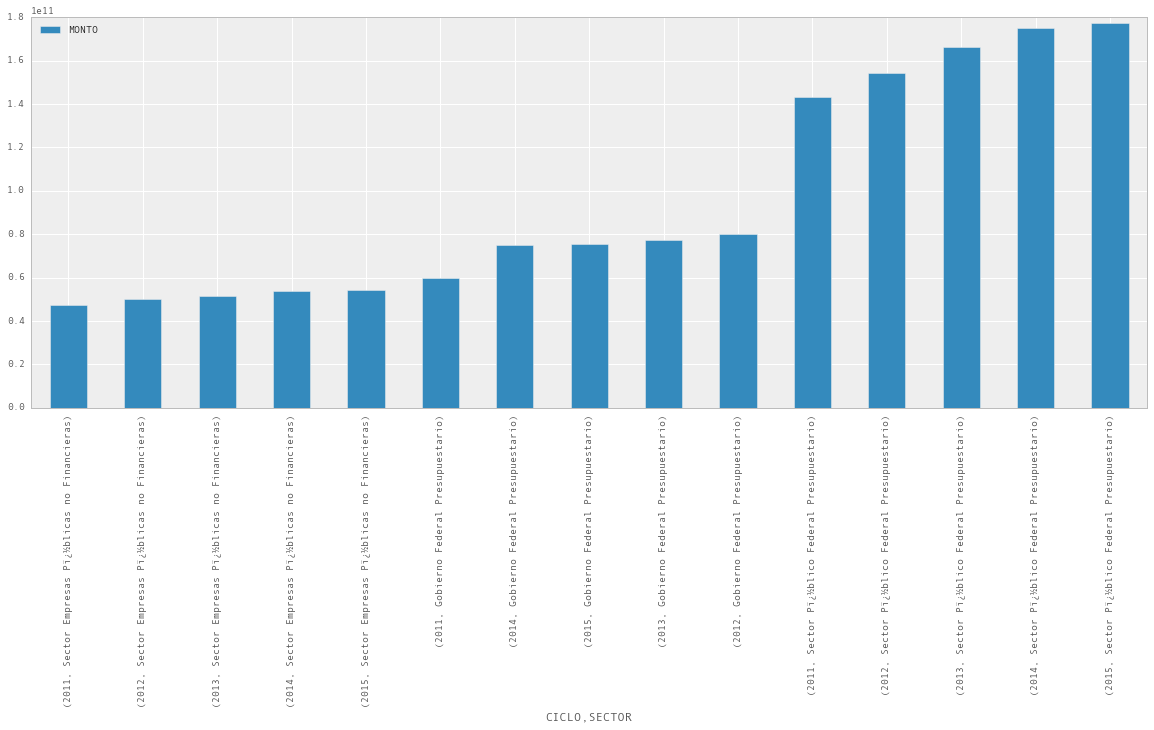

In [20]:
#Graficamos el resultado anterior.
Ingresos_2.groupby(['CICLO','SECTOR']).sum().sort_values(by='MONTO')[-15:].plot(kind='bar')

Los anteriores ejemplos, muestran como resolver preguntas sencillas donde se involugra algun variable categórica y su relación con otra numérica. Se pueden hacer agrupaciones más sofisticadas, donde se buscar ver la relación de más de 2 variables; ejemplo de Ciclo, Mes y Sector. 

Un poco de exploración gráfica
------------------------------

Lo que se puede hacer con los ejemplos anteriores; las agrupaciones, es mostrar ejemplos de como explorar gráficamente las muestras de datos procesadas y los datos originales. La única finalidad de las siguientes gráficas es explorar el comportamiento de los datos, sin tener una pregunta a investigar de manera inicial.

In [23]:
Grupo_1['MONTO'].agg([np.size,sum,max,min])


,size,sum,max,min
CICLO,,,,
2011,34532.0,3.780491e+11,9.642056e+08,-341516616.0
2012,35072.0,4.242216e+11,9.177154e+08,-260758053.0
2013,35132.0,4.393173e+11,1.108259e+09,-286257468.0
2014,34700.0,4.581749e+11,9.641380e+08,-337658441.0
2015,34836.0,4.703271e+11,6.798122e+08,-188056208.5
2016,34836.0,4.263203e+10,5.136199e+08,-99285802.0


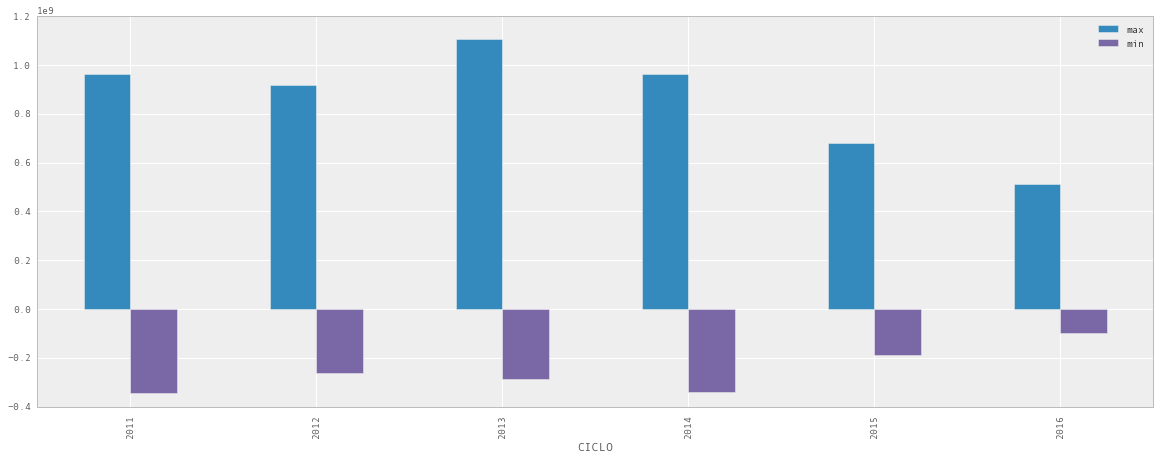

In [25]:
#El comportamiento entre máximo y mínimos
Grupo_1['MONTO'].agg([max,min]).plot(kind='bar')

In [29]:
#Se explora como se comporta la agrupación por mes por medio de una gráfica de barras.
Grupo_2['MONTO'].agg([max,min,np.mean])

,max,min,mean
MES,,,
Abril,1.108259e+09,-2.300844e+08,1.205833e+07
Agosto,5.026589e+08,-8.345890e+07,1.082641e+07
Diciembre,6.864657e+08,-3.415166e+08,1.550864e+07
Enero,9.641380e+08,-1.205653e+08,1.421048e+07
Febrero,9.480823e+08,-1.968601e+08,1.108835e+07
Julio,5.650079e+08,-1.261375e+08,1.227927e+07
Junio,6.197584e+08,-2.472895e+08,1.269322e+07
Marzo,9.436177e+08,-1.655531e+08,1.222004e+07
Mayo,4.968499e+08,-8.317165e+07,1.099283e+07


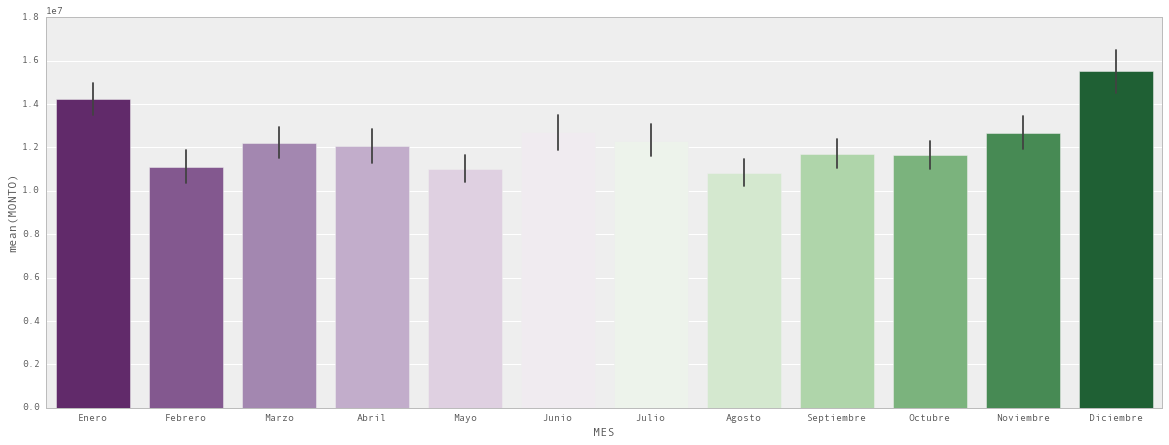

In [38]:
#Los datos originales, permiten explorar gráficamente como se relacionan los valors de los montos con respecto a los meses.
sns.barplot(data=Ingresos_2,x="MES",y="MONTO",palette="PRGn")

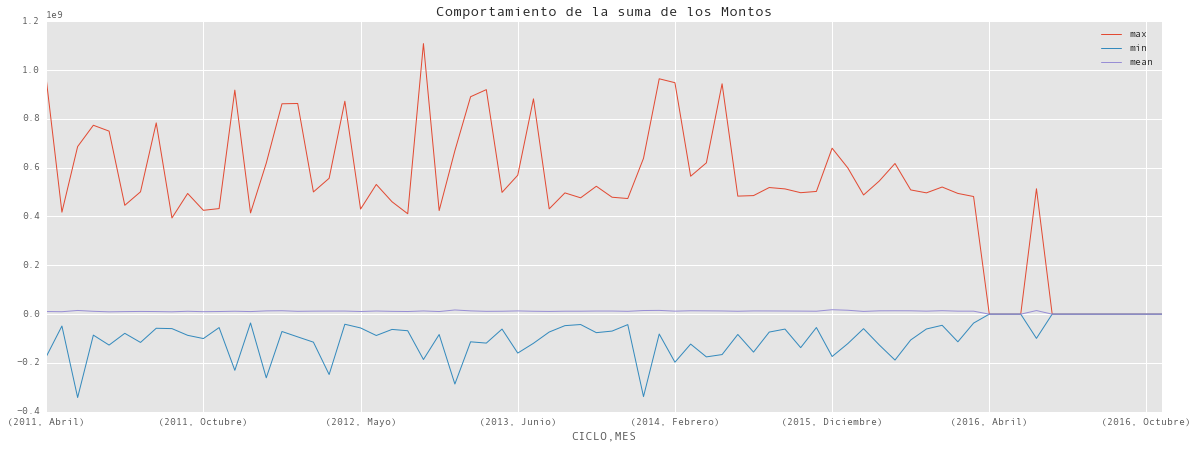

In [61]:
#También se puede explorar con los datos agrupados por Año-Mes el comportamiento de los máximos, mínimos y la media de los montos 

Grupo_3['MONTO'].agg([max,min,np.mean]).plot(title='Comportamiento de la suma de los Montos')

**Nota**: Los anteriores ejemplos solo muestran como hacer agrupaciones para concentrar información con respecto alga o algunas variables, esto ayuda hacer una exploración sencilla sobre los datos. Se pueden hacer más fina la exploración y procesamiento, pero no es la intención del ejemplo. Las preguntas que se responden no son para nada cosas sofisticadas y los gráficos que agrego son solo a manera de ejemplos de qué tipo de gráficos construir con el tipo de datos que se cargaron, esto gráficos se pueden adherir algun reporte para visualizar el tipo de respuestas a las preguntas; ¿cuál fue el mes con mayor media de ingresos?, ¿en qué año y mes se registan los máximos mas altos en los ingresos?, etc.

Para mayor detalle de las propiedades del módulo Pandas la recomendación es consultar la página oficial
  * http://pandas.pydata.org/